그래서 결국에 어떤 목차가 되어야 맞는지는 잘 모르겠다! 이지만,
지금 진행할 content0 의 목차를 고민해보자면

### Content 0 : 기간 별, 지역별 상품 수요량 확인
#### 1. fc 월별 데이터 합치기(수요의 흐름을 보고싶은 것이기 때문에)
#### 2. fc 월별 데이터 중 지역별 재고 수요와 1%정도의 관련도 없어보이는 column 삭제하기
#### 3. 결손 데이터 처리하기
#### 4. dtype 변환하기
**칼럼 코드를 한국어로 잘 바꿔서 주석만 달아놓기**
### Content1 : 시각화 하기
#### 1. 날짜 별로 상품 수요량 확인하기 (시각화 하기) 
#### 2. 지역 별로 상품 수요량 확인하기 (시각화 하기)
#### 3. FC 별로 지역별 수요량 확인하기

### Content1 : 다른 데이터 수집하기
분명 어느 정도 데이터 분석을 했고 주제 파악을 했다면 필요한 데이터가 어떤 것인지 확인될 것임.

### ContentN : Multi variable Regression 수행하기

In [1]:
import sys
import numpy as np
import pandas as pd

### 1. csv 파일 df로 불러오기

In [2]:
fc3_df = pd.read_csv('data_2021cj\data_ecommerceFC\FC_3.csv',encoding ='utf-8')

C:\anan\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
fc3_df.head(3)

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시


In [4]:
fc3_df.shape
#32개의 요소에 대한 309352-1 개의 정보

(309352, 32)

아래의 정보에 대해 조금의 설명을 달아보자면, Dtype 의 object는 문자열이라 생각하면 되고, 지금 SHPR_ADDR_2를 제외한 모든 COLUMN들이 30만개 이상의 NON-NULL임을 확인할 수 있다.


In [5]:
fc3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309352 entries, 0 to 309351
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CORP_ID             309352 non-null  object 
 1   REF_ORD_NO          309352 non-null  object 
 2   BKG_NO              309349 non-null  object 
 3   BKG_TYP             309352 non-null  int64  
 4   BKG_DATE            309352 non-null  int64  
 5   BKG_TIME            309352 non-null  int64  
 6   SHPR_CD             309352 non-null  int64  
 7   INV_AMT             305414 non-null  float64
 8   ITEM_SEQ            309352 non-null  int64  
 9   ITEM_CD             309352 non-null  object 
 10  BRAND_NM            301758 non-null  object 
 11  ITEM_QTY            309352 non-null  int64  
 12  ITEM_AMT            306284 non-null  float64
 13  IF_YN               309352 non-null  object 
 14  ORDER_CRT_DATETIME  301758 non-null  float64
 15  DLV_DV              309220 non-nul

- count : non-null인 데이터 건수
- mean : 전체 데이터의 평균값
- std : 표준편차
- min : 최솟값

In [6]:
fc3_df.describe()

,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_QTY,ITEM_AMT,ORDER_CRT_DATETIME,DLV_DV,INS_DATE,INS_TIME,POST_ZONE
count,309352.00000,3.093520e+05,309352.000000,3.093520e+05,3.054140e+05,309352.000000,309352.000000,3.062840e+05,3.017580e+05,309220.0,3.093520e+05,309352.000000,309220.000000
mean,7.00043,2.021032e+07,95035.831852,9.000141e+07,5.675440e+04,1.403576,2.030234,4.000405e+04,2.021032e+13,1.0,2.021032e+07,145352.291160,25.587055
std,0.02073,9.171140e+00,61630.865074,1.016592e+02,6.375390e+04,1.015545,294.231886,5.156776e+04,9.513625e+06,0.0,1.187998e+01,60230.814456,18.232241
min,7.00000,2.021030e+07,0.000000,9.000130e+07,0.000000e+00,1.000000,1.000000,0.000000e+00,2.021022e+13,1.0,2.021023e+07,4.000000,1.000000
25%,7.00000,2.021031e+07,42145.000000,9.000130e+07,1.990000e+04,1.000000,1.000000,1.335000e+04,2.021031e+13,1.0,2.021031e+07,104242.000000,10.000000
50%,7.00000,2.021032e+07,100004.000000,9.000134e+07,3.780000e+04,1.000000,1.000000,2.090000e+04,2.021032e+13,1.0,2.021032e+07,144244.000000,21.000000
75%,7.00000,2.021032e+07,133351.000000,9.000154e+07,7.160000e+04,1.000000,1.000000,4.380000e+04,2.021032e+13,1.0,2.021032e+07,201428.000000,42.000000
max,8.00000,2.021033e+07,235959.000000,9.000158e+07,4.760000e+06,35.000000,163200.000000,4.760000e+06,2.021033e+13,1.0,2.021041e+07,235637.000000,99.000000


### 2. 여러 fc 데이터 파일 하나로 합치기

In [7]:
fc4_df = pd.read_csv('data_2021cj\data_ecommerceFC\FC_4.csv')
fc5_df = pd.read_csv('data_2021cj\data_ecommerceFC\FC_5.csv')
fc6_df = pd.read_csv('data_2021cj\data_ecommerceFC\FC_6.csv')


C:\anan\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\anan\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
allFC_df = pd.concat([fc3_df,fc4_df, fc5_df, fc6_df])

In [9]:
allFC_df.head(10)

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
5,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,2,2475138283,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
6,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,3,4571859898-1,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
7,KX007,2021030365933981,KX007210303370935,7,20210303,35538,90001302,14900.0,1,603215395_1,...,1p,iNEXBatch,20210303,131425,47.0,N,세종특별자치시,NaN,부산광역시,연제구
8,KX007,2021030365934611,KX007210303370936,7,20210303,35732,90001302,19800.0,1,273205138_4,...,1,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
9,KX007,2021030365939621,KX007210303370968,7,20210303,35557,90001341,37900.0,1,5161458796,...,2,iNEXBatch,20210303,131426,4.0,N,경기도,광주시,서울특별시,성동구


In [10]:
allFC_df.shape

(1786374, 32)

In [11]:
allFC_df.describe()

,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_QTY,ITEM_AMT,ORDER_CRT_DATETIME,DLV_DV,INS_DATE,INS_TIME,POST_ZONE
count,1.786374e+06,1.786374e+06,1.786374e+06,1.786374e+06,1.758363e+06,1.786374e+06,1.786374e+06,1.767644e+06,1.744413e+06,1785331.0,1.786374e+06,1.786374e+06,1.785331e+06
mean,7.000586e+00,2.021050e+07,9.722577e+04,9.000148e+07,7.351862e+04,1.380549e+00,1.780672e+00,5.395772e+04,2.021050e+13,1.0,2.021050e+07,1.422477e+05,2.578878e+01
std,2.420249e-02,1.113475e+02,6.375165e+04,1.423993e+02,1.051609e+05,1.294329e+00,1.306268e+02,8.097853e+04,1.113782e+08,0.0,1.113587e+02,6.171412e+04,1.830104e+01
min,7.000000e+00,2.021030e+07,0.000000e+00,9.000130e+07,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.021022e+13,1.0,2.021023e+07,4.000000e+00,1.000000e+00
25%,7.000000e+00,2.021042e+07,4.203000e+04,9.000130e+07,2.180000e+04,1.000000e+00,1.000000e+00,1.580000e+04,2.021042e+13,1.0,2.021042e+07,1.035280e+05,1.000000e+01
50%,7.000000e+00,2.021052e+07,1.000565e+05,9.000152e+07,3.990000e+04,1.000000e+00,1.000000e+00,2.480000e+04,2.021052e+13,1.0,2.021052e+07,1.428410e+05,2.100000e+01
75%,7.000000e+00,2.021061e+07,1.358140e+05,9.000158e+07,8.680000e+04,1.000000e+00,1.000000e+00,5.960000e+04,2.021061e+13,1.0,2.021061e+07,1.949250e+05,4.200000e+01
max,8.000000e+00,2.021063e+07,2.359590e+05,9.000184e+07,7.968000e+06,1.160000e+02,1.632000e+05,7.968000e+06,2.021063e+13,1.0,2.021073e+07,2.356380e+05,9.900000e+01


In [12]:
allFC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786374 entries, 0 to 676911
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CORP_ID             object 
 1   REF_ORD_NO          object 
 2   BKG_NO              object 
 3   BKG_TYP             int64  
 4   BKG_DATE            int64  
 5   BKG_TIME            int64  
 6   SHPR_CD             int64  
 7   INV_AMT             float64
 8   ITEM_SEQ            int64  
 9   ITEM_CD             object 
 10  BRAND_NM            object 
 11  ITEM_QTY            int64  
 12  ITEM_AMT            float64
 13  IF_YN               object 
 14  ORDER_CRT_DATETIME  float64
 15  DLV_DV              float64
 16  REF_ITEM_SEQ        object 
 17  ORDER_IDX           object 
 18  ORDER_YN            object 
 19  DLVPREARRBRANCD     object 
 20  DLVPREARREMPNICKNM  object 
 21  DLVCLSFCD           object 
 22  DLVSUBCLSFCD        object 
 23  INS_ID              object 
 24  INS_DATE            int64

In [13]:
#concatenate 한 df 를 csv 파일로 만들기
allFC_df.to_csv("allFC_df.csv")

### 3. 다음은 굳이 코드로 표시되어 있는 정보들을 처리하기 쉽게 만들어본다.   
3-1) CORP_ID 가 곤지암 : KX007, 군포 : GP001 이런식으로 되어 있는데 곤지암을 0, 군포를 1로 바꾼다.

In [14]:
allFC_df.loc[(allFC_df['CORP_ID']=='KX007'),'CORP_ID']='0'
allFC_df.loc[(allFC_df['CORP_ID']=='GP001'),'CORP_ID']='1'

In [15]:
allFC_df.head(5)

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,0,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,0,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,0,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,0,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시


In [16]:
allFC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786374 entries, 0 to 676911
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CORP_ID             object 
 1   REF_ORD_NO          object 
 2   BKG_NO              object 
 3   BKG_TYP             int64  
 4   BKG_DATE            int64  
 5   BKG_TIME            int64  
 6   SHPR_CD             int64  
 7   INV_AMT             float64
 8   ITEM_SEQ            int64  
 9   ITEM_CD             object 
 10  BRAND_NM            object 
 11  ITEM_QTY            int64  
 12  ITEM_AMT            float64
 13  IF_YN               object 
 14  ORDER_CRT_DATETIME  float64
 15  DLV_DV              float64
 16  REF_ITEM_SEQ        object 
 17  ORDER_IDX           object 
 18  ORDER_YN            object 
 19  DLVPREARRBRANCD     object 
 20  DLVPREARREMPNICKNM  object 
 21  DLVCLSFCD           object 
 22  DLVSUBCLSFCD        object 
 23  INS_ID              object 
 24  INS_DATE            int64

크힉 순간 저 조건에 맞는 행들의 모든 열 값을 0으로 바꾸게 해버려 다 날라가는 상태가 발생했었다 ,, ㅎ 그래서 처음부터 다시 돌렸다,,

3-2) REF_ORD_NO 는 고객 주문번호, 해당 테이블 key 값, 네이버 채번,, 인데 음 BKG_DATE(주문 날짜) column에 들어가있는 값 + ,,65922551같은 숫자들은 모르겠는데,, 일단 굳이 앞의 주문날짜를 살려 놓을 필요는 없으니깐 삭제해버리고 뒷 부분의 숫자들은 어떤 값들인진 모르겠지만 해석을 못해먹겠고 코드,,짜기 귀찮으니 삭제해버린다.

In [17]:
allFC_df.drop(['REF_ORD_NO'],axis=1, inplace=True)#원본 데이터에서 날린거임!

3-3) BKG_NO는 대한통운 주문번호 (예약번호)이고 솔직히 다 필요없다고 생각해서 아예 column 전체를 날렸다.

In [18]:
allFC_df.drop(['BKG_NO'],axis=1, inplace=True) 

In [19]:
allFC_df

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,7,20210303,35510,90001302,22400.0,2,134265392,단일상품,1,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,0,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,0,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,0,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,0,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,1,7,20210628,91210,90001772,NaN,16,00281,NaN,100,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676908,1,7,20210628,91210,90001772,NaN,17,00316,NaN,168,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676909,1,7,20210628,91210,90001772,NaN,18,00338,NaN,100,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676910,1,7,20210628,91210,90001772,NaN,19,00183,NaN,50,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN


3-4) 아무래도 날려야할게 너무 많이 보여서 한 번에 날리기로 결심했다,,
- SHPR_CD : 고객사 코드
- ITEM_SEQ : 품목순번
- BRAND_NM : 품목명 (판매자가 설정해놓는 것이라고 한다. 품목의 종류를 확인하기 어렵다...)

In [20]:
allFC_df.drop(['SHPR_CD', 'ITEM_SEQ', 'BRAND_NM'],axis=1, inplace=True)

In [21]:
print(allFC_df)

       CORP_ID  BKG_TYP  BKG_DATE  BKG_TIME  INV_AMT        ITEM_CD  ITEM_QTY  \
0            0        7  20210303     35510  22400.0      134265392         1   
1            0        7  20210303     35521  20900.0   4610261043_2         1   
2            0        7  20210303     35513  37900.0   4936599538_1         1   
3            0        7  20210303     35608  69800.0   3858391637_1         1   
4            0        7  20210303     35551  73700.0     4631307460         1   
...        ...      ...       ...       ...      ...            ...       ...   
676907       1        7  20210628     91210      NaN          00281       100   
676908       1        7  20210628     91210      NaN          00316       168   
676909       1        7  20210628     91210      NaN          00338       100   
676910       1        7  20210628     91210      NaN          00183        50   
676911       1        7  20210628     91210      NaN  8809641651310       100   

        ITEM_AMT IF_YN  ORD

3-5) 계속 날리는데 사실 이 화면에 모든 column 항목들이 안떠서 계속 삭제하고 보고 ,, 하는 중이다. ㅋㅋㅋ
- IF_YN : 수신 여부를 확인하는 것인데 N이면 수신이 되지 않았다는 거임,,,? 어쨌든 일단은 날리고.. (뭔가 불안하니깐 inplace=False로 맞추겠음.)
- ORDER_CRT_DATETIME : 주문생성시간인데 이거 딱봐도 앞의 주문 날짜 + 주문시간한 거 합친 데이터임,, 왜 넣어놨냐고 용량아깝게;
.. 뒤에부터도 같이 삭제해야지.. 마지막 4열들은 위치 값들이니 살려놓고 
- SPLIT_EXEC_YN : 배송처별 주문분할 여부,,,,, 이거는 친구들과 함께 이야기해보구
- POST_ZONE : 권역구분 : 이것도 마찬가지,, 근데 숫자로 표시되어있네 신기하네
- INS 시리즈는 다 날린다,, 전부 입력자ID, 입력일자, 입력시간이고 아직 의미있는지 모르겠음..   
일단 이렇게만!

In [22]:
allFC_df.drop(['IF_YN','ORDER_CRT_DATETIME','INS_ID','INS_DATE','INS_TIME'],axis =1, inplace = True) 

In [23]:
print(allFC_df) 

       CORP_ID  BKG_TYP  BKG_DATE  BKG_TIME  INV_AMT        ITEM_CD  ITEM_QTY  \
0            0        7  20210303     35510  22400.0      134265392         1   
1            0        7  20210303     35521  20900.0   4610261043_2         1   
2            0        7  20210303     35513  37900.0   4936599538_1         1   
3            0        7  20210303     35608  69800.0   3858391637_1         1   
4            0        7  20210303     35551  73700.0     4631307460         1   
...        ...      ...       ...       ...      ...            ...       ...   
676907       1        7  20210628     91210      NaN          00281       100   
676908       1        7  20210628     91210      NaN          00316       168   
676909       1        7  20210628     91210      NaN          00338       100   
676910       1        7  20210628     91210      NaN          00183        50   
676911       1        7  20210628     91210      NaN  8809641651310       100   

        ITEM_AMT  DLV_DV   

In [24]:
allFC_df.head(3)

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,REF_ITEM_SEQ,...,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,7,20210303,35510,22400.0,134265392,1,14900.0,1.0,2021030323885041,...,7484,C06,5Z73,1,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,0,7,20210303,35521,20900.0,4610261043_2,1,20900.0,1.0,2021030323885721,...,6427,M09,6R67,4,50.0,N,경기도,광주시,경상남도,김해시
2,0,7,20210303,35513,37900.0,4936599538_1,1,37900.0,1.0,2021030323887981,...,6158,L32,9Y25,0,53.0,N,경기도,광주시,경상남도,거제시


아씨 칼럼 지워도 지워도 계속 많다.. 내일 할래,,,,,,

3-6) 마지막 날리기가 될 듯 싶다!   
- DLV_DV : 택배 구분인데 왜 float 값으로 저렇게 나와있지??
일단 지울 거는 
- ORDER_IDX : 중개업체 주문번호
- ORDER_YN : 접수여부

- DLVPREARREMPNICKNM : 배달예정사원 분류코드가 필요할까?? 일단은 지워보겠다,,

In [25]:
allFC_df= allFC_df.drop(['ORDER_IDX','ORDER_YN','DLVPREARREMPNICKNM'],axis =1, inplace = False) 

In [26]:
allFC_df.head(10)

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,REF_ITEM_SEQ,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,7,20210303,35510,22400.0,134265392,1,14900.0,1.0,2021030323885041,7484,5Z73,1,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,0,7,20210303,35521,20900.0,4610261043_2,1,20900.0,1.0,2021030323885721,6427,6R67,4,50.0,N,경기도,광주시,경상남도,김해시
2,0,7,20210303,35513,37900.0,4936599538_1,1,37900.0,1.0,2021030323887981,6158,9Y25,0,53.0,N,경기도,광주시,경상남도,거제시
3,0,7,20210303,35608,69800.0,3858391637_1,1,69800.0,1.0,2021030323895281,8909,1N65,1,6.0,N,경기도,광주시,서울특별시,서초구
4,0,7,20210303,35551,73700.0,4631307460,1,39800.0,1.0,2021030323897651,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시
5,0,7,20210303,35551,73700.0,2475138283,1,15900.0,1.0,2021030323897661,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시
6,0,7,20210303,35551,73700.0,4571859898-1,1,18000.0,1.0,2021030323897691,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시
7,0,7,20210303,35538,14900.0,603215395_1,1,14900.0,1.0,2021030323903491,M54T,6N20,1p,47.0,N,세종특별자치시,NaN,부산광역시,연제구
8,0,7,20210303,35732,19800.0,273205138_4,1,19800.0,1.0,2021030323904521,6174,6R67,1,50.0,N,경기도,광주시,경상남도,김해시
9,0,7,20210303,35557,37900.0,5161458796,1,37900.0,1.0,2021030323912641,8777,2U45,2,4.0,N,경기도,광주시,서울특별시,성동구


오 근데 INV_AMT: 주문금액에 대해서 마지막 row 쪽 값이 Nan값이 있고 이를 버려야 함!
#### 3-7) 결손 데이터 처리하기 
-> isna(): NaN여부를 확인하는 API   
-> fillna() : NaN값을 다른 값으로 대체쓰면 됨   

In [27]:
allFC_df.isna()

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,REF_ITEM_SEQ,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
676908,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
676909,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
676910,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True


True값은 NaN 값이 있다는 뜻.   

In [28]:
allFC_df.isna().sum() #칼럼별 NaN값 개수 확인 꺄악 다시 돌려버려서 다 0됨..ㅠㅠ

CORP_ID                 0
BKG_TYP                 0
BKG_DATE                0
BKG_TIME                0
INV_AMT             28011
ITEM_CD                 0
ITEM_QTY                0
ITEM_AMT            18730
DLV_DV               1043
REF_ITEM_SEQ         1000
DLVPREARRBRANCD      1043
DLVCLSFCD            1043
DLVSUBCLSFCD         1150
POST_ZONE            1043
SPLIT_EXEC_YN           0
SHPR_ADDR_1             0
SHPR_ADDR_2        109251
CNEE_ADDR_1            35
CNEE_ADDR_2         35977
dtype: int64

In [29]:
#allFC_df=allFC_df.dropna() #결손 데이터를 다 날리는건데,, 흐음 이게 맞을까 
#이시ㅜ키 돌리고 돌렸어ㅠㅠ

In [30]:
allFC_df.isna().sum() #이럼 다시 볼 필요없잖아

CORP_ID                 0
BKG_TYP                 0
BKG_DATE                0
BKG_TIME                0
INV_AMT             28011
ITEM_CD                 0
ITEM_QTY                0
ITEM_AMT            18730
DLV_DV               1043
REF_ITEM_SEQ         1000
DLVPREARRBRANCD      1043
DLVCLSFCD            1043
DLVSUBCLSFCD         1150
POST_ZONE            1043
SPLIT_EXEC_YN           0
SHPR_ADDR_1             0
SHPR_ADDR_2        109251
CNEE_ADDR_1            35
CNEE_ADDR_2         35977
dtype: int64

INV_AMT, ITEM_AMT, DLV_DV, REF_ITEM_SEQ, DLVPREARRBRANCD, DLVCLSFCD, DLVSUBCLSFCD, POST_ZONE, SHPR_ADDR_2, CNEE_ADDR_1, CNEE_ADDR_2 : True 값이 있음 (즉 NaN값이 존재하고 이를 날려버림)

# 이 부분이 문제다!
일단 위에 다 삭제하지는 말고,,
*allFC_df의 NaN값을 다 지워버렸는데 이 NaN값을 채워야함 -> 보통 평균값으로 채우는데,, 각 칼럼별로 dtype을 보면서 해야할 것 같으니 일단,,흐음 일단 해본다.*   
dtype 별로 구분!
- float64 : INV_AMT(주문금액), ITEM_AMT(품목금액), DLV_DV(택배구분), POST_ZONE(권역구분)
- object : REF_ITEM_SEQ(상품주문번호)-> 이거 왜 안날림;;하핳 다시 돌리기 지겨운데ㅠ, DLVPREARRBRANCD(배달예정점소코드), DLVCLSFCD(배달터미널코드), SHPR_ADDR_2(송화인 주소2), CNEE_ADDR_1(수화인 주소1), CNEE_ADDR_2(수화인 주소2)

float64 애들은 일단 택배구분이랑 권역구분 빼고는 fillna() 로 평균값으로 맞춰놔도 될 듯 싶음!
object 쪽 결손데이터는 어떻게 해야하징,,

## 이거 아직 안끝냄!

In [31]:
allFC_df['INV_AMT'].fillna(allFC_df['INV_AMT'].mean())

0         22400.000000
1         20900.000000
2         37900.000000
3         69800.000000
4         73700.000000
              ...     
676907    73518.623345
676908    73518.623345
676909    73518.623345
676910    73518.623345
676911    73518.623345
Name: INV_AMT, Length: 1786374, dtype: float64

In [32]:
allFC_df['ITEM_AMT'].fillna(allFC_df['ITEM_AMT'].mean())

0         14900.000000
1         20900.000000
2         37900.000000
3         69800.000000
4         39800.000000
              ...     
676907    53957.716636
676908    53957.716636
676909    53957.716636
676910    53957.716636
676911    53957.716636
Name: ITEM_AMT, Length: 1786374, dtype: float64

In [33]:
allFC_df

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,REF_ITEM_SEQ,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,7,20210303,35510,22400.0,134265392,1,14900.0,1.0,2021030323885041,7484,5Z73,1,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,0,7,20210303,35521,20900.0,4610261043_2,1,20900.0,1.0,2021030323885721,6427,6R67,4,50.0,N,경기도,광주시,경상남도,김해시
2,0,7,20210303,35513,37900.0,4936599538_1,1,37900.0,1.0,2021030323887981,6158,9Y25,0,53.0,N,경기도,광주시,경상남도,거제시
3,0,7,20210303,35608,69800.0,3858391637_1,1,69800.0,1.0,2021030323895281,8909,1N65,1,6.0,N,경기도,광주시,서울특별시,서초구
4,0,7,20210303,35551,73700.0,4631307460,1,39800.0,1.0,2021030323897651,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,1,7,20210628,91210,NaN,00281,100,NaN,1.0,00281,8981,5F20,1,10.0,N,경기도,군포시,경기도,NaN
676908,1,7,20210628,91210,NaN,00316,168,NaN,1.0,00316,8981,5F20,1,10.0,N,경기도,군포시,경기도,NaN
676909,1,7,20210628,91210,NaN,00338,100,NaN,1.0,00338,8981,5F20,1,10.0,N,경기도,군포시,경기도,NaN
676910,1,7,20210628,91210,NaN,00183,50,NaN,1.0,00183,8981,5F20,1,10.0,N,경기도,군포시,경기도,NaN


CORP_ID : dtype = object 인데 일단 이걸 int로 바꿔보기

In [34]:
allFC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786374 entries, 0 to 676911
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CORP_ID          object 
 1   BKG_TYP          int64  
 2   BKG_DATE         int64  
 3   BKG_TIME         int64  
 4   INV_AMT          float64
 5   ITEM_CD          object 
 6   ITEM_QTY         int64  
 7   ITEM_AMT         float64
 8   DLV_DV           float64
 9   REF_ITEM_SEQ     object 
 10  DLVPREARRBRANCD  object 
 11  DLVCLSFCD        object 
 12  DLVSUBCLSFCD     object 
 13  POST_ZONE        float64
 14  SPLIT_EXEC_YN    object 
 15  SHPR_ADDR_1      object 
 16  SHPR_ADDR_2      object 
 17  CNEE_ADDR_1      object 
 18  CNEE_ADDR_2      object 
dtypes: float64(4), int64(4), object(11)
memory usage: 272.6+ MB


In [35]:
allFC_df.astype({'CORP_ID':'int64'}).dtypes#으아 오버플로우 에러 뜸..멍청이었음 칼럼지정안함 당연히 오버플로 뜨지

CORP_ID              int64
BKG_TYP              int64
BKG_DATE             int64
BKG_TIME             int64
INV_AMT            float64
ITEM_CD             object
ITEM_QTY             int64
ITEM_AMT           float64
DLV_DV             float64
REF_ITEM_SEQ        object
DLVPREARRBRANCD     object
DLVCLSFCD           object
DLVSUBCLSFCD        object
POST_ZONE          float64
SPLIT_EXEC_YN       object
SHPR_ADDR_1         object
SHPR_ADDR_2         object
CNEE_ADDR_1         object
CNEE_ADDR_2         object
dtype: object

일단 칼럼별 정리는 끝냈고! 여러 함수들을 적용하면서 데이터가 어떻게 분포되어있는지 파악한 뒤 FC별 수요량을 확인해보겠음!

- CORP_ID 는 곤지암을 0, 군포를 1로 바꾸었다. 대략 어디에 상품이 더 많을지(..이런식으로 말을 해도 될까 싶지만!) 확인해보려면 평균값을 알아본다.   
근데 생각보다 너무 오래걸리는데? 왜지...

CORP_ID 를 기준으로 데이터를 분류할 것이므로 내가 모든 값을 잘 바꾼건지 확인을 datatype을 통해 확인했다. (object -> int32로 바뀌었음을 확인할 수 있음.)

### 4. FC별 상품 수요량 파악하기

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

4-1) groupby() 적용 -> CORP_ID 기준으로! 

In [36]:
allFC_df_groupby = allFC_df.groupby(by='CORP_ID')
print(type(allFC_df_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [37]:
allFC_df_groupby = allFC_df.groupby(by='CORP_ID').count()
allFC_df_groupby

,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,REF_ITEM_SEQ,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
CORP_ID,,,,,,,,,,,,,,,,,,
0,1606010,1606010,1606010,1580274,1606010,1606010,1587419,1605000,1605010,1605000,1605000,1604965,1605000,1606010,1606010,1582547,1606003,1572312
1,180364,180364,180364,178089,180364,180364,180225,180331,180364,180331,180331,180259,180331,180364,180364,94576,180336,178085


In [ ]:
allFC_df_groupby.plot.bar()
plt.show()

곤지암 : 1542726   
군포 : 180364
만큼의 상품품목들이 존재.   
이다음에 뭐 해야할 지 결정해야함!

4-2) 곤지암, 군포 창고에서 어느 지역으로 얼마나 이동하는지   
- 그냥 pivot 테이블을 쓰는게 맞겠다.   
- 그래서 내가 하고 싶은게 뭐냐면 FC 구분이 row(index)에 두개로 들어가고, column에 수십 혹은 수백개가 될 수도 있는 배달터미널코드를 써서 이 FC에서 각 지역별로 몇개의 상품품목이 들어갔는지를 확인하고 싶음!

### 4-3) 곤지암 FC로부터의 배달터미널코드!

In [56]:
FC0_df = allFC_df[allFC_df['CORP_ID']=='0']

In [60]:
FC0_df_groupby = FC0_df.groupby('DLVCLSFCD').count()
FC0_df_groupby

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,REF_ITEM_SEQ,DLVPREARRBRANCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
DLVCLSFCD,,,,,,,,,,,,,,,,,,
1M15,7928,7928,7928,7928,7813,7928,7928,7850,7928,7920,7928,7928,7928,7928,7928,7808,7928,7770
1M27,15329,15329,15329,15329,15135,15329,15329,15188,15329,15318,15329,15329,15329,15329,15329,15133,15329,15044
1M32,6165,6165,6165,6165,6109,6165,6165,6117,6165,6164,6165,6165,6165,6165,6165,6056,6165,6068
1M34,5990,5990,5990,5990,5922,5990,5990,5936,5990,5988,5990,5990,5990,5990,5990,5860,5990,5892
1M36,6298,6298,6298,6298,6192,6298,6298,6213,6298,6297,6298,6298,6298,6298,6298,6189,6298,6180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XJ76,817,817,817,817,806,817,817,807,817,816,817,817,817,817,817,807,817,801
XJ78,400,400,400,400,393,400,400,393,400,400,400,400,400,400,400,400,400,390
XJ82,334,334,334,334,320,334,334,321,334,334,334,334,334,334,334,331,334,316


..좀 보기 별로게 만들어버렸지만 일단 곤지암FC에서 나가는 상품들의 배달터미널코드는 총 323개가 있다. 아래의 데이터는 축약본!

In [61]:
FC0_df['DLVCLSFCD'].value_counts()

4A70    19087
4C40    16033
1M27    15329
4A16    15185
3B47    14511
        ...  
JJ08        2
8Z66        2
9F73        1
9E36        1
9Y01        1
Name: DLVCLSFCD, Length: 323, dtype: int64

### 4-4) 군포 FC로부터의 배달터미널코드!

총 344개의 배달터미널로 상품이 간다! -> 보유하고 있는 상품의 수는 곤지암보다 적지만 더 많은 터미널과 연결되어 있음을 확인할 수 있음!

In [62]:
FC1_df = allFC_df[allFC_df['CORP_ID']=='1']

In [63]:
FC1_df['DLVCLSFCD'].value_counts()

4A70    2183
1M27    1735
4A16    1681
6P47    1616
6R39    1613
        ... 
5F20      20
WV86      17
1R13       3
0J12       1
0J25       1
Name: DLVCLSFCD, Length: 344, dtype: int64

오.. 이렇게 된 이상 배달터미널코드 별로도 한 번 살펴봐야할 것 같은데~~?
### 4-5) 배달 터미널 코드 별 FC 상품량

여기선 데이터에 쓸데없는 값(은 물론 아니지만)의 칼럼은 좀 많이 지우고 남길거만 남겨서 진행해보겠음.

- BKG_DATE : 주문 날짜
- ITEM_CD : 품목 코드

..시각화 하고 싶어서 일단 주문날짜 칼럼도 날려봄!

In [ ]:
allFC_df_ext = allFC_df[['CORP_ID','DLVCLSFCD','ITEM_CD']]

In [79]:
allFC_df_ext['CORP_ID'].astype('int')

0         0
1         0
2         0
3         0
4         0
         ..
676907    1
676908    1
676909    1
676910    1
676911    1
Name: CORP_ID, Length: 1786374, dtype: int32

In [82]:
allFC_df_ext['CORP_ID'].dtypes

dtype('O')

위에 애들 진짜 어쩌란건지 모르겠음....뭐가 잘못된거지,, 나 분명 int로 데이터타입 바꾼거 아냐? 이제 물론 의미없게 쓰긴했음;

In [89]:
#피벗 테이블 사용해서 위의 배달터미널코드 별 FC 로 가는 상품들의 갯수를 count 해줬음.
allFC_df_ext_pt = pd.pivot_table(allFC_df_ext,index ='DLVCLSFCD',columns='CORP_ID',aggfunc='count')

In [90]:
allFC_df_ext_pt

BKG_DATE          ITEM_CD        
CORP_ID          0       1        0       1
DLVCLSFCD                                  
0J12           NaN     1.0      NaN     1.0
0J25           NaN     1.0      NaN     1.0
1M15        7928.0   853.0   7928.0   853.0
1M27       15329.0  1735.0  15329.0  1735.0
1M32        6165.0   522.0   6165.0   522.0
...            ...     ...      ...     ...
XJ76         817.0   105.0    817.0   105.0
XJ78         400.0    53.0    400.0    53.0
XJ82         334.0    23.0    334.0    23.0
XJ84        2265.0   271.0   2265.0   271.0
XK39        1379.0   156.0   1379.0   156.0

[349 rows x 4 columns]

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

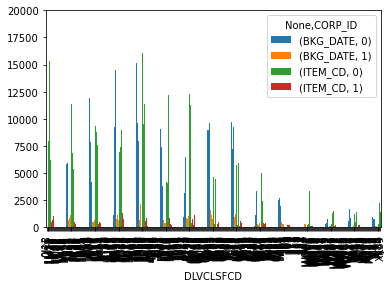

In [93]:
allFC_df_ext_pt.plot.bar()
plt.show()

In [69]:
allFC_df_groupby2 = allFC_df.groupby(['DLVCLSFCD', 'CORP_ID'])
allFC_df_groupby2

In [70]:
allFC_df_groupby2.count()

BKG_TYP  BKG_DATE  BKG_TIME  INV_AMT  ITEM_CD  ITEM_QTY  \
DLVCLSFCD CORP_ID                                                            
0J12      1              1         1         1        1        1         1   
0J25      1              1         1         1        1        1         1   
1M15      0           7928      7928      7928     7813     7928      7928   
          1            853       853       853      843      853       853   
1M27      0          15329     15329     15329    15135    15329     15329   
...                    ...       ...       ...      ...      ...       ...   
XJ82      1             23        23        23       23       23        23   
XJ84      0           2265      2265      2265     2202     2265      2265   
          1            271       271       271      269      271       271   
XK39      0           1379      1379      1379     1362     1379      1379   
          1            156       156       156      155      156       156   

                   ITEM_AMT  DLV_DV  REF_ITEM_SEQ  DLVPREARRBRANCD  \
DLVCLSFCD CORP_ID                                                    
0J12      1               1       1             1                1   
0J25      1               1       1             1                1   
1M15      0            7850    7928          7920             7928   
          1             853     853           853              853   
1M27      0           15188   15329         15318            15329   
...                     ...     ...           ...              ...   
XJ82      1              23      23            23               23   
XJ84      0            2221    2265          2265             2265   
          1             271     271           271              271   
XK39      0            1370    1379          1375             1379   
          1             156     156           156              156   

                   DLVSUBCLSFCD  POST_ZONE  SPLIT_EXEC_YN  SHPR_ADDR_1  \
DLVCLSFCD CORP_ID                                                        
0J12      1                   1          1              1            1   
0J25      1                   1          1              1            1   
1M15      0                7928       7928           7928         7928   
          1                 853        853            853          853   
1M27      0               15329      15329          15329        15329   
...                         ...        ...            ...          ...   
XJ82      1                  23         23             23           23   
XJ84      0                2265       2265           2265         2265   
          1                 271        271            271          271   
XK39      0                1379       1379           1379         1379   
          1                 156        156            156          156   

                   SHPR_ADDR_2  CNEE_ADDR_1  CNEE_ADDR_2  
DLVCLSFCD CORP_ID                                         
0J12      1                  1            1            1  
0J25      1                  0            1            1  
1M15      0               7808         7928         7770  
          1                418          853          843  
1M27      0              15133        15329        15044  
...                        ...          ...          ...  
XJ82      1                 14           23           23  
XJ84      0               2243         2265         2196  
          1                163          271          269  
XK39      0               1360         1379         1345  
          1                 89          156          155  

[667 rows x 17 columns]

In [41]:
allFC_df_groupby = allFC_df.groupby('CORP_ID')
for i in allFC_df_groupby:
    print(type(i))


<class 'tuple'>
<class 'tuple'>


In [52]:
allFC_df.groupby('CORP_ID')[['DLVCLSFCD']].agg(['count'])

,DLVCLSFCD
,count
CORP_ID,
0,1605000
1,180331
